In [8]:
import scipy as sp
from scipy import stats, optimize, interpolate
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #'last' 기본값

# 27절: 베르누이 분포와 이항 분포

# 베르누이 확률 분포

## 베르누이 시도

결과가 성공(Success) 혹은 실패(Fail) 두 가지 중 하나로만 나오는 것

## 베르누이 분포

확률 질량 함수(pmf: probability mass function)로 정의

$\text{Bern}(x;\theta) = 
\begin{cases} 
\theta   & \text{if }x=1, \\
1-\theta & \text{if }x=0
\end{cases}$

하나의 수식으로 표현

$\text{Bern}(x;\theta) = \theta^x(1-\theta)^{(1-x)}$

## SciPy를 사용한 베르누이 분포의 시뮬레이션

rv.pmf(xx) : 확률 질량 함수(pmf: probability mass function)를 계산<br>
p 모수 $\theta$

<Container object of 2 artists>

(-1, 2)

(0, 1)

([<matplotlib.axis.XTick at 0xa9ba1d0>, <matplotlib.axis.XTick at 0xaac48d0>],
 <a list of 2 Text xticklabel objects>)

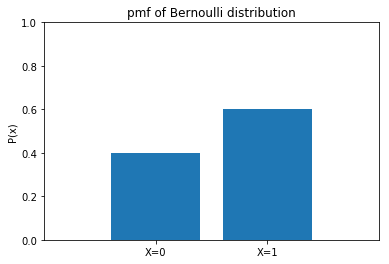

In [5]:
theta = 0.6
rv = sp.stats.bernoulli(theta)

xx = [0, 1]
plt.bar(xx, rv.pmf(xx), align="center")
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["X=0", "X=1"])
plt.ylabel("P(x)")
plt.title("pmf of Bernoulli distribution")
plt.show()

시뮬레이션을 하려면 rvs 

In [6]:
x = rv.rvs(100, random_state=0)
x

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1])

결과를 seaborn의 countplot 명령으로 시각화

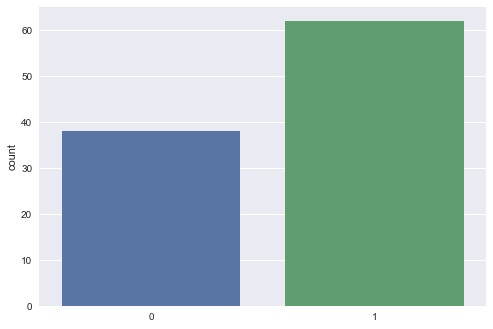

In [9]:
sns.countplot(x)
plt.show()

확률 분포와 샘플의 확률 분포를 동시에 출력

In [10]:
y = np.bincount(x, minlength=2) / float(len(x))

df = pd.DataFrame({"theoretic": rv.pmf(xx), "simulation": y})
df.index = [0, 1]
df

,simulation,theoretic
0,0.38,0.4
1,0.62,0.6


seaborn의 barplot 명령으로 시각화

In [11]:
df2 = df.stack().reset_index()
df2.columns = ["value", "type", "ratio"]
df2

,value,type,ratio
0,0,simulation,0.38
1,0,theoretic,0.40
2,1,simulation,0.62
3,1,theoretic,0.60


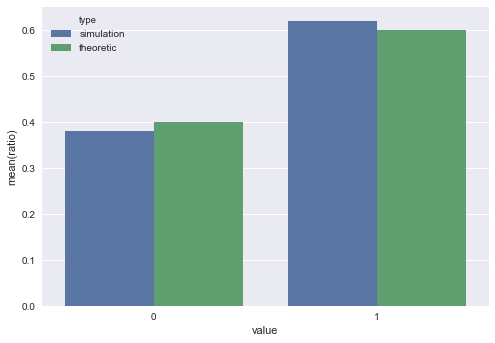

In [12]:
sns.barplot(x="value", y="ratio", hue="type", data=df2)
plt.show()

## 베르누이 분포의 모멘트

기댓값, 분산


In [15]:
np.mean(x)
np.var(x, ddof=1)


0.62

0.23797979797979804

In [16]:
s = sp.stats.describe(x)
s
pd.Series(x).describe()

DescribeResult(nobs=100, minmax=(0, 1), mean=0.62, variance=0.23797979797979804, skewness=-0.4944513860581973, kurtosis=-1.755517826825128)

count    100.000000
mean       0.620000
std        0.487832
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
dtype: float64

# 이항 확률 분포

성공확률이 θ 인 베르누이 시도를 N 번 하는 경우

$x = \sum_{i=1}^N y_i$

이항 분포 수식 

$\text{Bin}(x;N,\theta) = \binom N x  \theta^x(1-\theta)^{N-x}$

# SciPy를 사용한 베르누이 분포의 시뮬레이션

Scipy의 stats 서브 패키지에 있는 binom 클래스 



In [17]:
# 모수 설정 N, theta(p)
N = 10
theta = 0.6
rv = sp.stats.binom(N, theta)
rv

pmf 메서드를 사용하면 확률 질량 함수(pmf: probability mass function)를 계산

<Container object of 11 artists>

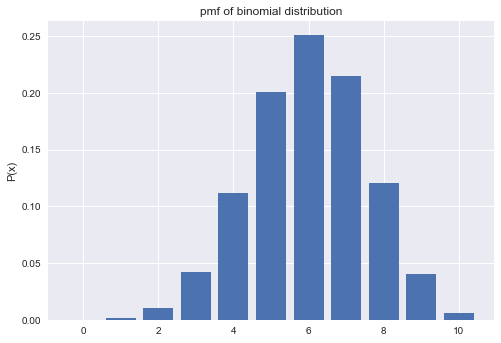

In [18]:
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align="center")
plt.ylabel("P(x)")
plt.title("pmf of binomial distribution")
plt.show()

시뮬레이션 

array([ 6,  5,  6,  6,  6,  5,  6,  4,  3,  6,  5,  6,  6,  4,  8,  8,  9,
        5,  5,  4,  3,  5,  6,  5,  8,  5,  8,  4,  6,  6,  7,  5,  6,  6,
        9,  6,  6,  6,  4,  5,  7,  6,  5,  8,  5,  5,  7,  8,  7,  7,  6,
        6,  2,  8,  7,  8,  5,  7,  6,  7,  8,  8,  5,  8,  7,  7,  5,  8,
        4,  8,  3,  6,  3,  6,  5,  9,  7,  8,  7,  8,  7,  6,  8,  5,  6,
        7,  6,  8,  6,  4,  7,  5,  8,  5,  7,  7,  6,  9,  5, 10])

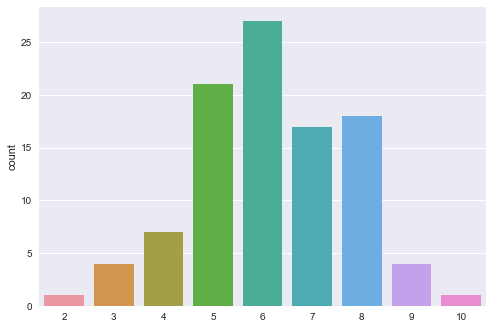

In [19]:
np.random.seed(0)
x = rv.rvs(100)
x

sns.countplot(x)
plt.show()

이론적인 확률 분포와 샘플의 확률 분포 동시

In [20]:
y = np.bincount(x, minlength=N+1)/float(len(x))
df = pd.DataFrame({"theoretic": rv.pmf(xx), "simulation": y}).stack()
df = df.reset_index()
df.columns = ["value", "type", "ratio"]
df.pivot("value", "type", "ratio")

type,simulation,theoretic
value,,
0,0.00,0.000105
1,0.00,0.001573
2,0.01,0.010617
3,0.04,0.042467
4,0.07,0.111477
5,0.21,0.200658
6,0.27,0.250823
7,0.17,0.214991
8,0.18,0.120932


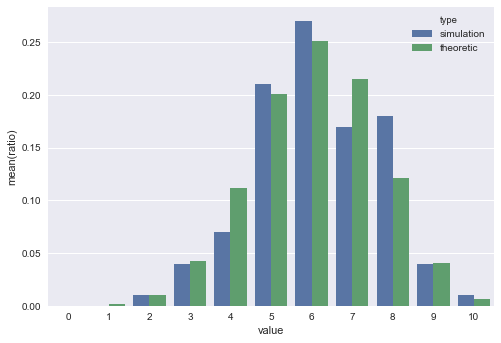

In [21]:
sns.barplot(x="value", y="ratio", hue="type", data=df)
plt.show()

# 28절: 정규 분포와 스튜던트 t 분포

## 가우시안 정규 분포

정규 분포

평균  μ 와 분산 σ2 이라는 두 개의 모수만으로 정의

$\mathcal{N}(x; \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right)$

표준 정규 분포(standard normal distribution) 평균이 0 이고 분산이 1 인 ( μ=0 , σ2=1 ) 정규 분포

## SciPy를 사용한 정규 분포의 시뮬레이션

Scipy의 stats 서브 패키지에 있는 norm 클래스

loc 인수로 평균을 설정하고 scale 인수로 표준 편차를 설정

In [ ]:
mu = 0
std = 1
rv = sp.stats.norm(mu, std)
rv